# Programming for Data Analysis

## Project Objective:

In this project we have to create a dataset by simulating a real world phenomenon of our choice. And have to model and synthesise such data using Python package of numpy.random


## Project Scope:

1. Dataset should be at least one-hundred data points across at least four different variables.

2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.

3. Synthesise/simulate a data set as closely matching their properties as possible.

4. Detail your research and implement the simulation in a Jupyter notebook.

### Let's get started !!!

## 1. Importing the required libraries

In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
from matplotlib import pyplot as plt #visualisation
import warnings
warnings.filterwarnings('ignore')

## 2. Selection of Dataset and Attributes

For this project i will create a song track dataset which can be used for real problems like music recommendation, rating prediction of a song, top 10 songs of the year. The columns of the data set will be 6 and the total rows will be 200. The column attributes are as follows:

Song_id = int
&nbsp; #Unique ID for every song in the dataset, in total there are 200 songs in the dataset

Listen_count = int 
&nbsp; #Number of times a song was listened

Year = int 
[2015, 2020]
&nbsp; #Release year of the song track

Genre = str
&nbsp; [pop, rock, jazz, hiphop, disco, folk]

Downloads = int
&nbsp; #Number of downloads of each song

Rating = float
&nbsp; #Average rating of each song


## 3. Generating Dataset using Numpy Random Module

We will use normal distribution for listen counts and number of downloads and for ratings we'll use unifrom distribution from 1 to 5. The year and genre will be randomly selected using randint and random choice.

In [2]:
# total number of rows:
rows = 200

# list arrays for dataset column attributes:
song_id = []
listen_counts = []
year = []
genre = []
no_downloads = []
rating = []

np.random.seed(22)

for i in range(rows):
    song_id.append(i+1)
    
    genre.append(np.random.choice(["pop", "rock", "jazz", "hiphop", "disco", "folk"]))
    
    if genre[i] in ["rock", "jazz", "disco"]:
        listen_counts.append(int(np.random.normal(loc=2500, scale=625)))
        
        no_downloads.append(int(np.random.normal(loc=5000, scale=1250)))
    
    else:
        listen_counts.append(int(np.random.normal(loc=1250, scale=312.5)))
        
        no_downloads.append(int(np.random.normal(loc=2500, scale=625))) 
    
    year.append(np.random.randint(low = 2015, high= 2020))
    
    if year[i] in [2015, 2016, 2017]:
        rating.append(round(np.random.uniform(3.1,5), 1))
    else:
        rating.append(round(np.random.uniform(1,3), 1))

## 4. Creating DataFrame For Better view of Dataset

In [3]:
# column name list
col_names = ['Song_Id', 'Genre', 'Listen_Counts', 'Year', 'No_of_Downloads', 'Ratings']

# create an empty dataframe
# with columns
df = pd.DataFrame(columns=col_names)

try:
    df['Song_Id']         = pd.Series(song_id)
    df['Genre']           = pd.Series(genre)
    df['Listen_Counts']   = pd.Series(listen_counts)
    df['Year']            = pd.Series(year)
    df['No_of_Downloads'] = pd.Series(no_downloads)
    df['Ratings']         = pd.Series(rating)

except Exception as e:
    print("Error:",e)

## 5. Displaying Dataset:

In [4]:
# show the dataframe starting 5 rows
df.head(5)

,Song_Id,Genre,Listen_Counts,Year,No_of_Downloads,Ratings
0,1,folk,1578,2018,3076,1.3
1,2,disco,3074,2015,3620,4.6
2,3,jazz,3320,2018,5320,1.9
3,4,folk,919,2018,3159,2.4
4,5,jazz,1740,2019,7414,2.4


In [5]:
# last 5 rows
df.tail()

,Song_Id,Genre,Listen_Counts,Year,No_of_Downloads,Ratings
195,196,hiphop,1735,2019,1456,2.8
196,197,jazz,1863,2016,6877,4.9
197,198,pop,1402,2015,2653,3.7
198,199,jazz,2099,2015,6095,4.6
199,200,pop,1455,2016,2747,3.9


## 6.Shape of dataset
shape method returns a tuple of rows and column count.

In [6]:
print("Dataset Shape: ", df.shape, "\nRows: ",df.shape[0], " Columns: ",df.shape[1])

Dataset Shape:  (200, 6) 
Rows:  200  Columns:  6


## 7. Basic Description of the Dataset:

1. Total number of null values in each column

2. Total Number of filled values in each column

3. Information about each column

In [7]:
df.isnull().sum()

Song_Id            0
Genre              0
Listen_Counts      0
Year               0
No_of_Downloads    0
Ratings            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Song_Id          200 non-null    int64  
 1   Genre            200 non-null    object 
 2   Listen_Counts    200 non-null    int64  
 3   Year             200 non-null    int64  
 4   No_of_Downloads  200 non-null    int64  
 5   Ratings          200 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


In [9]:
df.describe().round(decimals=2) #understanding the descriptive statistics overview, with 2point decimals

,Song_Id,Listen_Counts,Year,No_of_Downloads,Ratings
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,1886.16,2016.94,3840.48,3.34
std,57.88,821.38,1.43,1681.42,1.14
min,1.00,370.00,2015.00,769.00,1.00
25%,50.75,1251.75,2016.00,2545.75,2.40
50%,100.50,1712.00,2017.00,3472.00,3.50
75%,150.25,2466.00,2018.00,5091.50,4.30
max,200.00,4294.00,2019.00,7976.00,5.00


In [10]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
# print("number of duplicate rows: ") 
duplicate_rows_df.shape[0]

0

### Finding the relations between the variables

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. 
One of the best way to find the correlation between the attributes can be done using heat maps.

<AxesSubplot:>

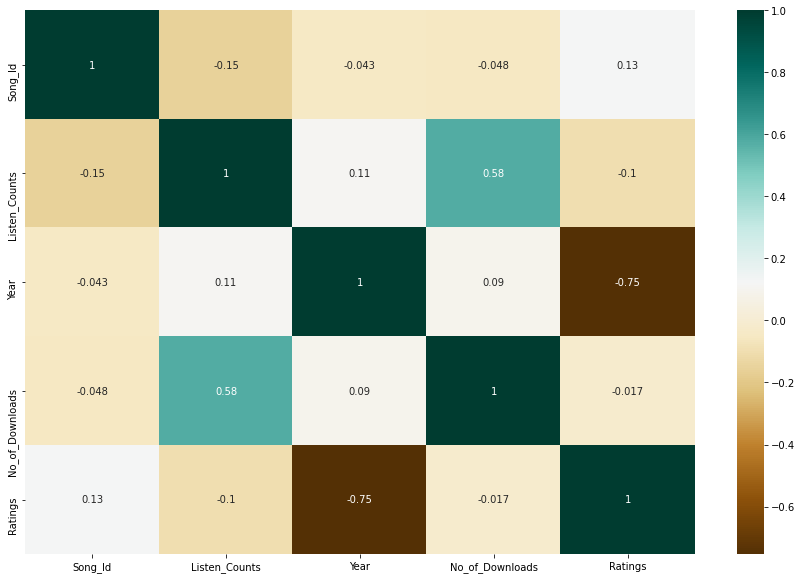

In [12]:
#creating a correlation heatmap from the dataframe
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap="BrBG")

### Box Plot

A box plot is a method for graphically depicting groups of numerical data through their quartiles.
If there is an outlier it will plotted as point in boxplot but other population will be grouped together and display as boxes.

<AxesSubplot:xlabel='Listen_Counts'>

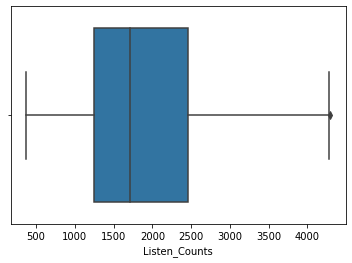

In [13]:
sns.boxplot(x=df['Listen_Counts'])

<AxesSubplot:xlabel='No_of_Downloads'>

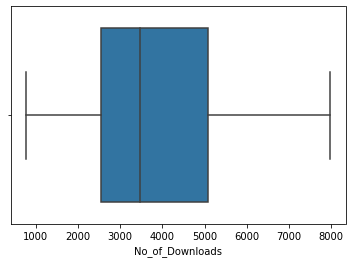

In [14]:
sns.boxplot(x=df['No_of_Downloads'])

### Distrubution Histogram of Ratings

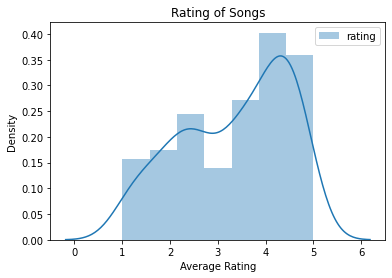

In [15]:
sns.distplot(df['Ratings'], label="rating")
plt.xlabel("Average Rating")
plt.ylabel("Density")
plt.title("Rating of Songs")
plt.legend()
# plt.grid()
plt.show()

### Histogram of Year of Song Release

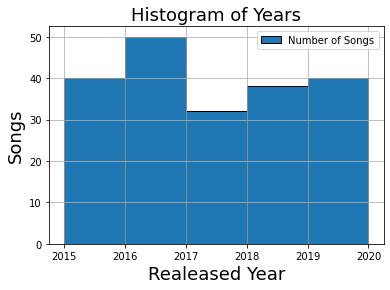

In [16]:
plt.title('Histogram of Years', fontsize=18)
mybins = [2015, 2016, 2017, 2018, 2019,2020]
plt.hist(df['Year'], label="Number of Songs", bins=mybins, edgecolor='black')
plt.xlabel('Realeased Year' , fontsize=18)
plt.ylabel('Songs', fontsize=18)
plt.legend()
plt.grid()
plt.show()

### Generating Pie Chart of Genre of Songs.

<Figure size 720x576 with 0 Axes>

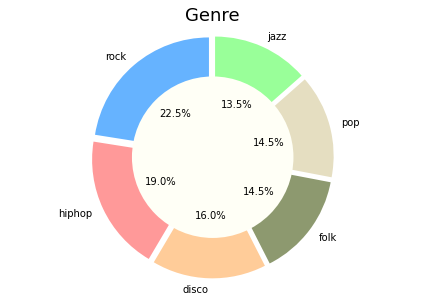

In [17]:
genre_groups_count = df.Genre.value_counts()

# Pie chart
labels = ['rock', 'hiphop', 'disco', 'folk', 'pop', 'jazz']

#colors
# colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
colors = ['#66b3ff','#ff9999','#ffcc99','#8d996f', '#e5dec1', '#99ff99']
#explsion
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
plt.figure(figsize=(10, 8))
fig1, ax1 = plt.subplots()
plt.pie(genre_groups_count, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.45, 
        explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='#fffff6')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Genre", fontsize=18)
plt.show()

### Dependencies:

In [20]:
%load_ext watermark
%watermark -v -p pandas,numpy,matplotlib,seaborn

CPython 3.6.12
IPython 7.16.1

pandas 1.1.4
numpy 1.19.4
matplotlib 3.3.2
seaborn 0.11.0
